# **Unsupervised Learning on Country Data**

## **Goal:** categorize the countries using socio-economic and health factors that determine the overall development of the country.

## **Model type:** kmeans clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## **EDA**

In [3]:
print(df.shape)

null_counts = df.isnull().sum()

# Put results into a DataFrame for clarity
null_summary = pd.DataFrame({
    'Column': null_counts.index,
    'Null_Count': null_counts.values
})

print(null_summary)

(167, 10)
       Column  Null_Count
0     country           0
1  child_mort           0
2     exports           0
3      health           0
4     imports           0
5      income           0
6   inflation           0
7  life_expec           0
8   total_fer           0
9        gdpp           0


In [4]:
print(df.duplicated().sum())  # number of duplicates

0


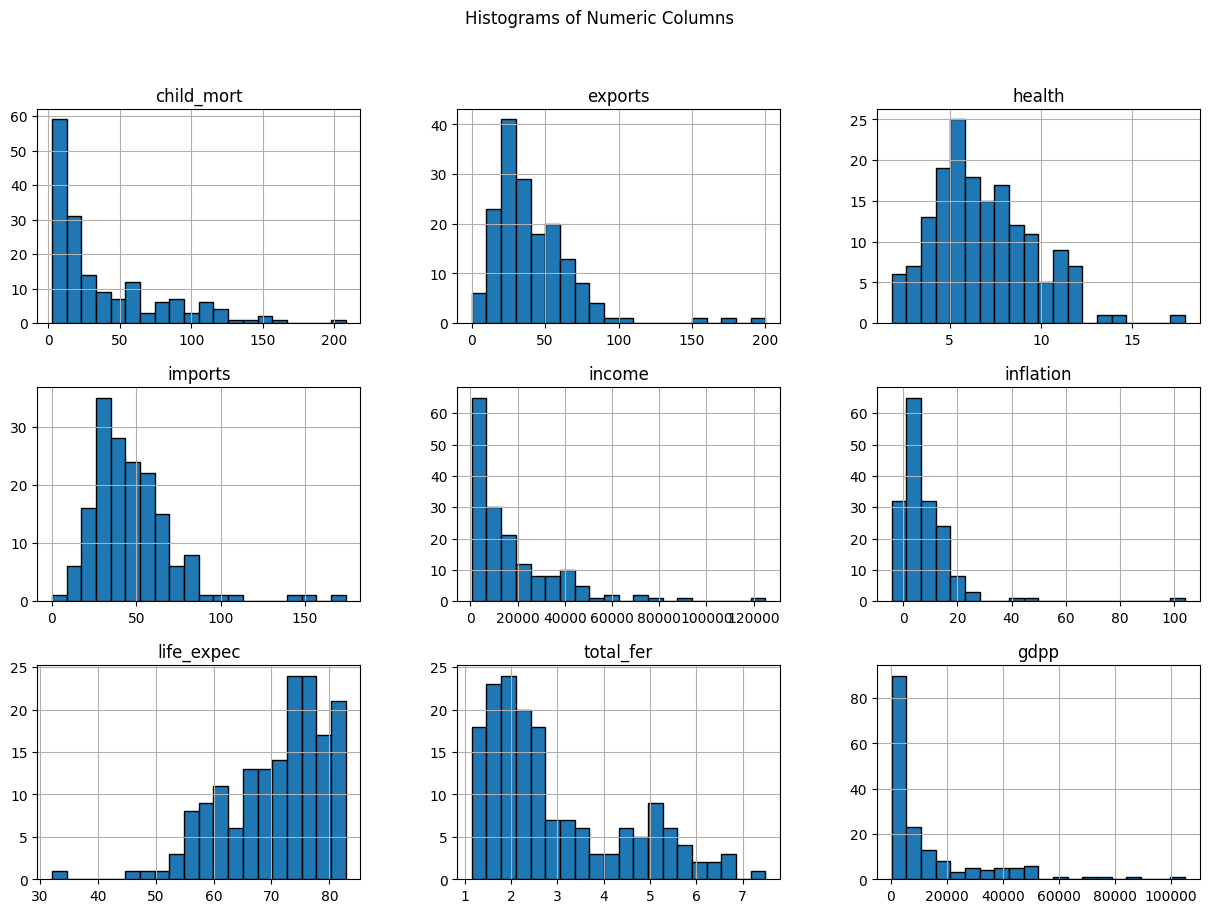

In [5]:
# histrograms of all the numeric columns
numeric_df = df.drop("country", axis=1)
numeric_df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Columns")
plt.show()

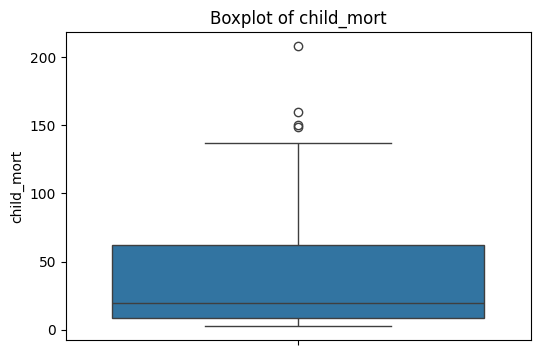

📊 Summary for child_mort:
   Min     : 2.60
   Q1 (25%): 8.25
   Median  : 19.30
   Mean    : 38.27
   Q3 (75%): 62.10
   Max     : 208.00
   IQR     : 53.85
   Outliers: [149. 150. 208. 160.]
--------------------------------------------------


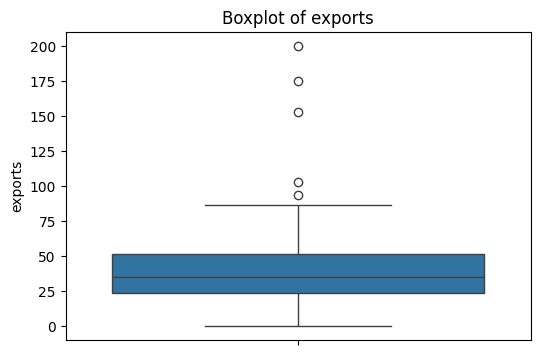

📊 Summary for exports:
   Min     : 0.11
   Q1 (25%): 23.80
   Median  : 35.00
   Mean    : 41.11
   Q3 (75%): 51.35
   Max     : 200.00
   IQR     : 27.55
   Outliers: [103.  175.  153.   93.8 200. ]
--------------------------------------------------


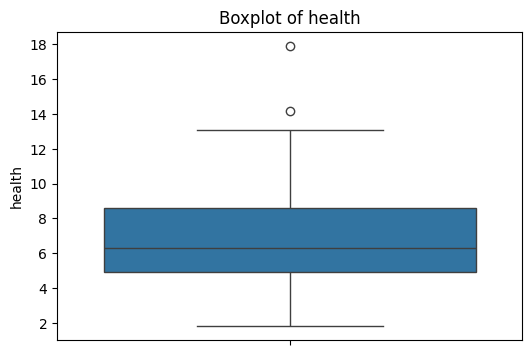

📊 Summary for health:
   Min     : 1.81
   Q1 (25%): 4.92
   Median  : 6.32
   Mean    : 6.82
   Q3 (75%): 8.60
   Max     : 17.90
   IQR     : 3.68
   Outliers: [14.2 17.9]
--------------------------------------------------


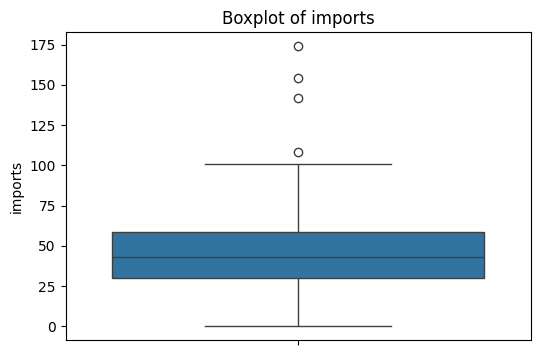

📊 Summary for imports:
   Min     : 0.07
   Q1 (25%): 30.20
   Median  : 43.30
   Mean    : 46.89
   Q3 (75%): 58.75
   Max     : 174.00
   IQR     : 28.55
   Outliers: [142. 154. 108. 174.]
--------------------------------------------------


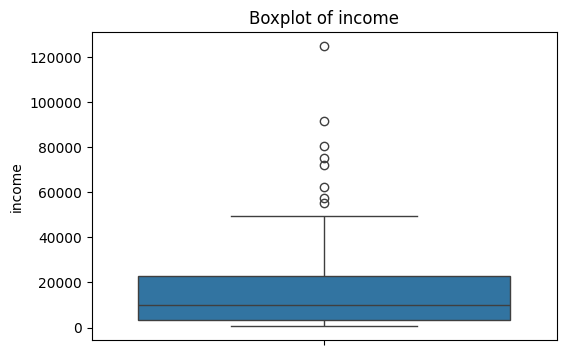

📊 Summary for income:
   Min     : 609.00
   Q1 (25%): 3355.00
   Median  : 9960.00
   Mean    : 17144.69
   Q3 (75%): 22800.00
   Max     : 125000.00
   IQR     : 19445.00
   Outliers: [ 80600  75200  91700  62300 125000  72100  55500  57600]
--------------------------------------------------


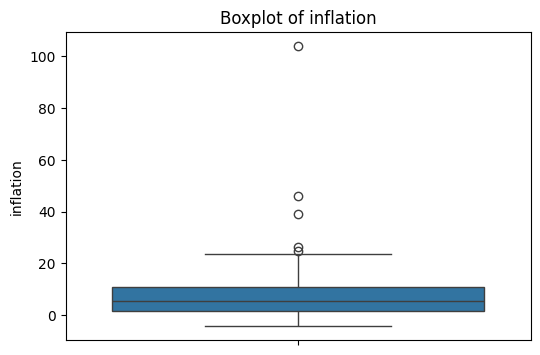

📊 Summary for inflation:
   Min     : -4.21
   Q1 (25%): 1.81
   Median  : 5.39
   Mean    : 7.78
   Q3 (75%): 10.75
   Max     : 104.00
   IQR     : 8.94
   Outliers: [ 24.9  39.2 104.   26.5  45.9]
--------------------------------------------------


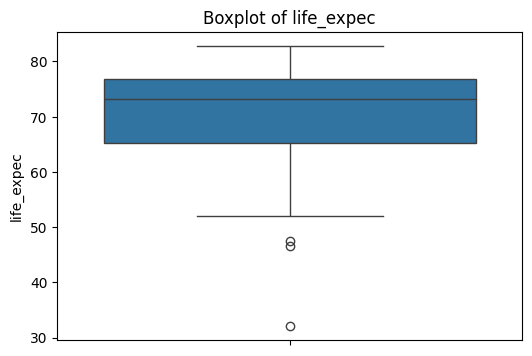

📊 Summary for life_expec:
   Min     : 32.10
   Q1 (25%): 65.30
   Median  : 73.10
   Mean    : 70.56
   Q3 (75%): 76.80
   Max     : 82.80
   IQR     : 11.50
   Outliers: [47.5 32.1 46.5]
--------------------------------------------------


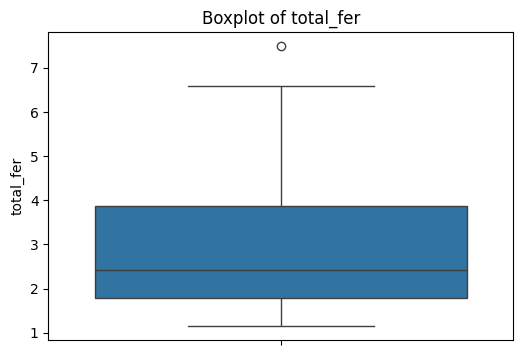

📊 Summary for total_fer:
   Min     : 1.15
   Q1 (25%): 1.79
   Median  : 2.41
   Mean    : 2.95
   Q3 (75%): 3.88
   Max     : 7.49
   IQR     : 2.08
   Outliers: [7.49]
--------------------------------------------------


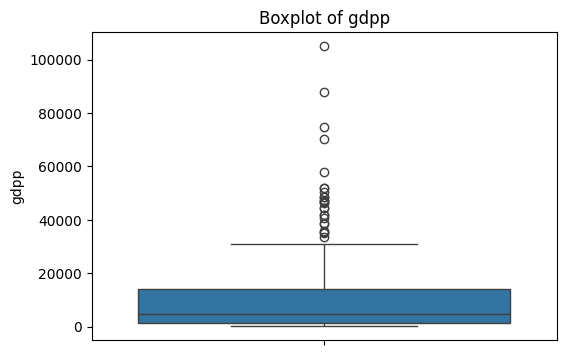

📊 Summary for gdpp:
   Min     : 231.00
   Q1 (25%): 1330.00
   Median  : 4660.00
   Mean    : 12964.16
   Q3 (75%): 14050.00
   Max     : 105000.00
   IQR     : 12720.00
   Outliers: [ 51900  46900  44400  35300  47400  58000  46200  40600  41800  41900
  48700  35800  44500  38500 105000  50300  33700  87800  70300  46600
  52100  74600  35000  38900  48400]
--------------------------------------------------


In [6]:
# boxplots of numeric cols
for col in numeric_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=numeric_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    # summary stats
    desc = numeric_df[col].describe()
    q1 = desc["25%"]
    q2 = desc["50%"]
    q3 = desc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)][col].values

    print(f"📊 Summary for {col}:")
    print(f"   Min     : {desc['min']:.2f}")
    print(f"   Q1 (25%): {q1:.2f}")
    print(f"   Median  : {q2:.2f}")
    print(f"   Mean    : {desc['mean']:.2f}")
    print(f"   Q3 (75%): {q3:.2f}")
    print(f"   Max     : {desc['max']:.2f}")
    print(f"   IQR     : {iqr:.2f}")
    print(f"   Outliers: {outliers if len(outliers) > 0 else 'None'}")
    print("-"*50)

In [7]:
print("\nNumber of unique countries:", df["country"].nunique())


Number of unique countries: 167


In [8]:
print(df["country"].unique()[:])

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

In [9]:
# clean country column
df["country"] = df["country"].str.strip()          # remove leading/trailing spaces
df["country"] = df["country"].str.title()          # standardize capitalization (e.g. "india" -> "India")
df["country"] = df["country"].str.replace(r"\s+", " ", regex=True)  # replace multiple spaces with one

# Lets Start the Modeling Process

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# get rid of names, not important, its like an id
X = df.drop('country', axis=1)

# standardixe num vals
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Like I mentioned in my google doc, K-means is very sensitive to hyperparatemrter tuninig. It needs to exact right amount of k's.

## We can be proactive about finding this number by using some techniques that that help me find when adding more clusters reduces the outcome.

## I will be using the Elbow method and Silhoutte Score.

In [12]:
from sklearn.cluster import KMeans

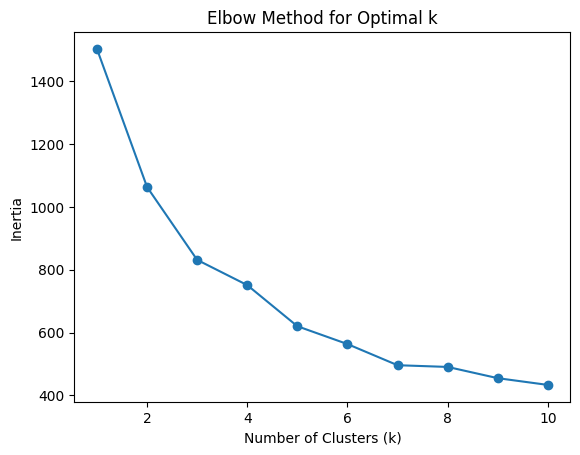

In [13]:
inertia = []  # this is the within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## Elbow method suggests K is 3-5.

In [14]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.266
k=3, silhouette score=0.286
k=4, silhouette score=0.288
k=5, silhouette score=0.301
k=6, silhouette score=0.236


## For silhoutte score, the closest score to 1 is k = 5.

# Based on both outputs, it looks like the best choice of K is 5!

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
cluster_summary = df.drop(columns=['country']).groupby('Cluster').mean().round(2)
display(cluster_summary)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.22,41.08,6.25,47.80,12678.97,7.73,72.63,2.33,6494.39
1,5.18,46.12,9.09,40.58,44021.88,2.51,80.08,1.79,42118.75
2,94.31,28.68,6.33,42.87,3503.25,9.90,59.02,5.05,1753.91
3,130.00,25.30,5.07,17.40,5150.00,104.00,60.50,5.84,2330.00
4,4.13,176.00,6.79,156.67,64033.33,2.47,81.43,1.38,57566.67


---
Cluster 0:

Moderate income and GDP
Child mortality (22) and fertility (2.3) are moderate
Life expectancy around 72 years
Inflation slightly high (7.7%)
These are emerging or developing economies. They're not poor, but not wealthy.

---

Cluter 1:
Very low child mortality and fertility
Very high income and GDP
High life expectancy (80 years)
Low, stable inflation
These are highly developed countries.

---

Cluter 2:
Extremely high child mortality (94)
Very low GDP (1,753) and income (3,503)
Shorter life expectancy (59)
High fertility (5.05)
These represent low-income developing nations.

---
Cluster 3:
High child mortality (130) and fertility (5.8)
Low GDP/income but extremely high inflation (104%)
Shorter life expectancy
These may be economically unstable or crisis countries.Experiencing hyperinflation or severe economic turmoil.

---

Cluster 4:
Lowest child mortality and fertility
Very high income (64k) and GDP (57k)
High life expectancy (81)
Stable inflation (2.47%)
Very high imports and exports
These are the wealthiest, globally connected countries.

---




In [17]:
cluster_labels = {
    0: 'Developing Nations',
    1: 'Developed Nations',
    2: 'Least Developed Nations',
    3: 'Economically Unstable Nations',
    4: 'Ultra-High-Income Nations'
}

df['Development_Level'] = df['Cluster'].map(cluster_labels)

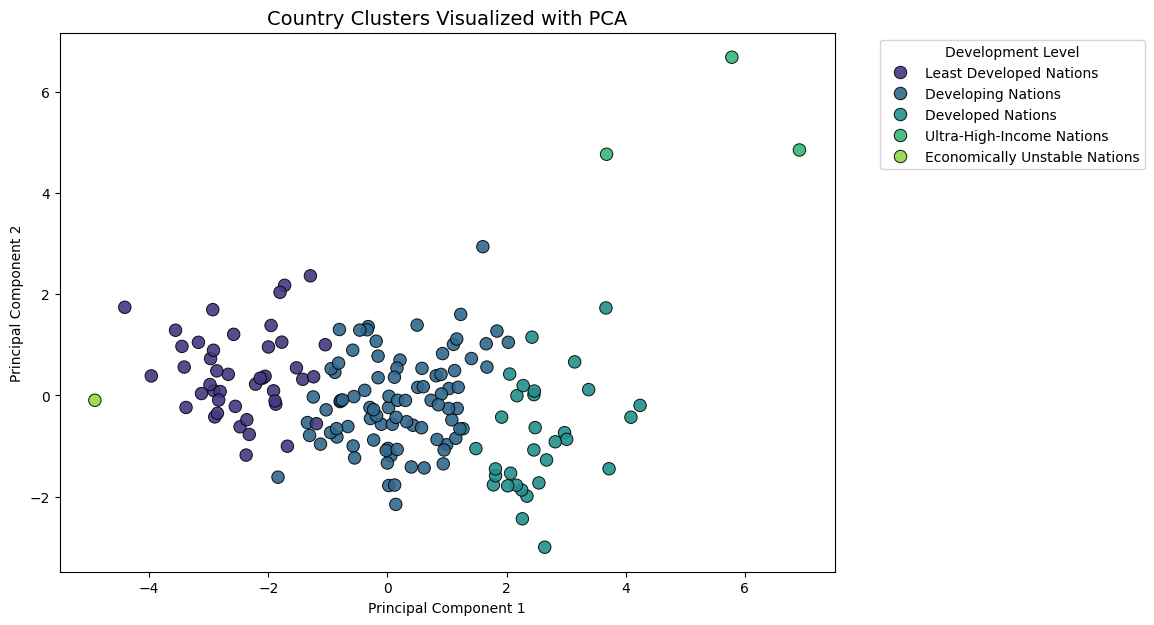

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# PCA again if needed
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# --- Plot using seaborn for auto-color & legend ---
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x='PCA1', y='PCA2',
    hue='Development_Level',  # uses your mapped labels
    palette='viridis',        # consistent colors
    s=80, alpha=0.9, edgecolor='black'
)

plt.title('Country Clusters Visualized with PCA', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Development Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



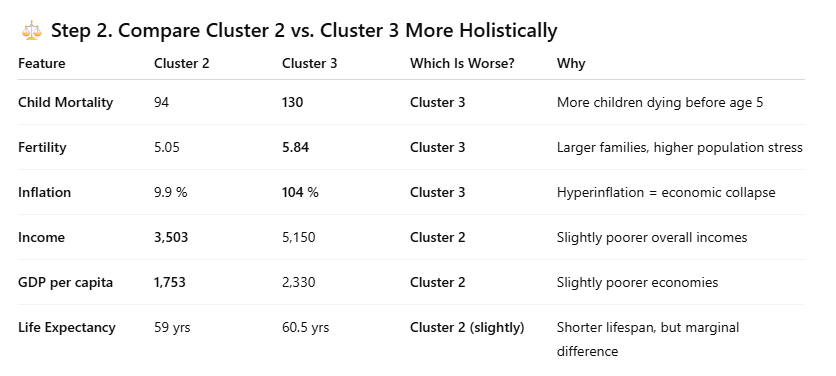

In [19]:
cluster_3_countries = df[df['Cluster'] == 3]
cluster_3_countries[['country', 'child_mort', 'income', 'gdpp', 'inflation']].sort_values(by='child_mort', ascending=False)

,country,child_mort,income,gdpp,inflation
113,Nigeria,130.0,5150,2330,104.0


Although Cluster 2 countries display extremely low GDP and income, further analysis revealed that Cluster 3 countries are in even more critical condition. They exhibit the highest child mortality rate (130 deaths per 1,000 live births), the highest fertility rate, and hyperinflation exceeding 100 %, indicating severe economic instability. These conditions reflect countries facing both economic and humanitarian crises.
Therefore, Cluster 3 was identified as the group most urgently in need of direct aid, as their populations are likely experiencing simultaneous health, economic, and structural challenges.

/tmp/ipython-input-1774546255.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='child_mort', palette='viridis')


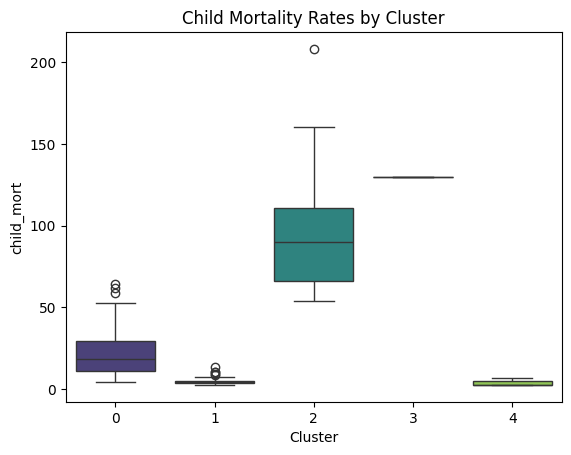

In [20]:
sns.boxplot(data=df, x='Cluster', y='child_mort', palette='viridis')
plt.title('Child Mortality Rates by Cluster')
plt.show()

## Fidning the otherts countries from the clusters

In [21]:

for i in range(5):  # since K=5
    print(f"\n=== 🌍 Countries in Cluster {i} ===")
    cluster_countries = df[df['Cluster'] == i][['country', 'child_mort', 'income', 'gdpp', 'inflation']]
    display(cluster_countries.sort_values(by='child_mort', ascending=False))


=== 🌍 Countries in Cluster 0 ===


,country,child_mort,income,gdpp,inflation
107,Myanmar,64.4,3720,988,7.040
154,Turkmenistan,62.0,9940,4440,2.310
69,India,58.8,4410,1350,8.980
21,Botswana,52.5,13300,6350,8.920
146,Tajikistan,52.4,2110,738,12.500
...,...,...,...,...,...
67,Hungary,6.0,22300,13100,2.330
121,Poland,6.0,21800,12600,1.660
14,Belarus,5.5,16200,6030,15.100
41,Croatia,5.5,20100,13500,0.821



=== 🌍 Countries in Cluster 1 ===


,country,child_mort,income,gdpp,inflation
10,Bahamas,13.8,22900,28000,-0.393
82,Kuwait,10.8,75200,38500,11.200
23,Brunei,10.5,80600,35300,16.700
123,Qatar,9.0,125000,70300,6.980
157,United Arab Emirates,8.6,57600,35000,12.500
159,United States,7.3,49400,48400,1.220
111,New Zealand,6.2,32300,33700,3.730
29,Canada,5.6,40700,47400,2.870
158,United Kingdom,5.2,36200,38900,1.570
7,Australia,4.8,41400,51900,1.160



=== 🌍 Countries in Cluster 2 ===


,country,child_mort,income,gdpp,inflation
66,Haiti,208.0,1500,662,5.450
132,Sierra Leone,160.0,1220,399,17.200
32,Chad,150.0,1930,897,6.390
31,Central African Republic,149.0,888,446,2.010
97,Mali,137.0,1870,708,4.370
112,Niger,123.0,814,348,2.550
3,Angola,119.0,5900,3530,22.400
25,Burkina Faso,116.0,1430,575,6.810
37,"Congo, Dem. Rep.",116.0,609,334,20.800
64,Guinea-Bissau,114.0,1390,547,2.970



=== 🌍 Countries in Cluster 3 ===


,country,child_mort,income,gdpp,inflation
113,Nigeria,130.0,5150,2330,104.0



=== 🌍 Countries in Cluster 4 ===


,country,child_mort,income,gdpp,inflation
98,Malta,6.8,28300,21100,3.830
91,Luxembourg,2.8,91700,105000,3.620
133,Singapore,2.8,72100,46600,-0.046
